In [1]:
import tensorflow as tf

# Libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


Import dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Verify shapes and structure of acquired data

In [4]:
train_images.shape
train_images = train_images / 255.0
test_images = test_images / 255.0

Plot examples with corresponding label

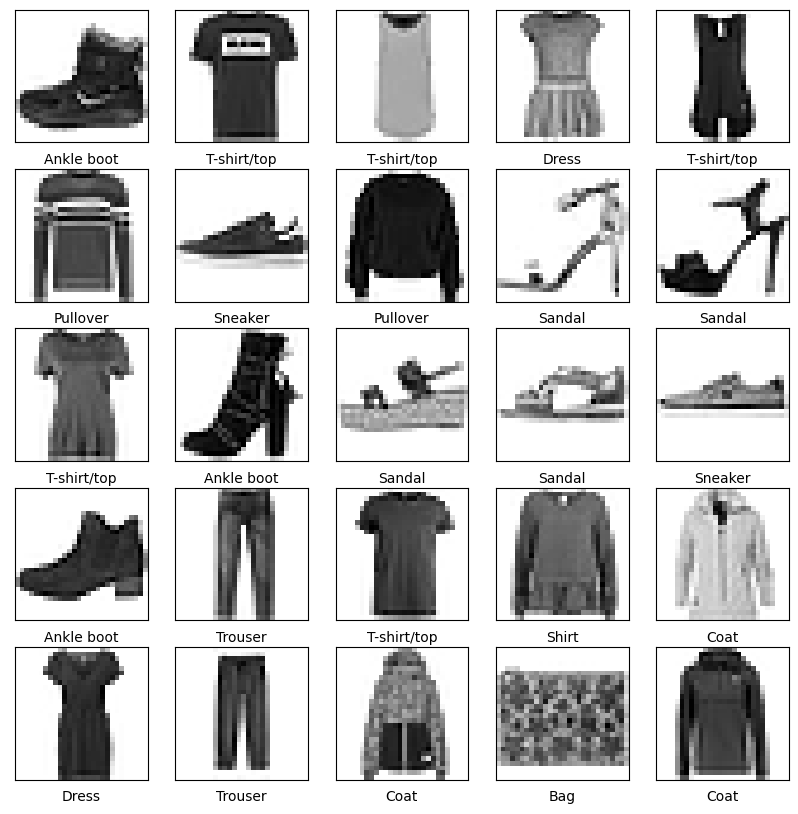

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train model on training data and keep track of emissions. Added to emissions.csv

In [8]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker(output_dir='../reports', output_file='emissions.csv')
tracker.start()

model.fit(train_images, train_labels, epochs=10)
tracker.stop()

# uncomment to save the model in models folder
# model.save('../models/fashion_mnist.h5') 

[codecarbon ERROR @ 12:52:13] Error: Another instance of codecarbon is already running. Turn off the other instance to be able to run this one. Exiting.
[codecarbon WARNING @ 12:52:13] Another instance of codecarbon is already running. Exiting.


Epoch 1/10


2024-10-31 12:52:14.168850: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 737us/step - loss: 0.4980 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 1s 624us/step - loss: 0.3758 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 1s 554us/step - loss: 0.3377 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 1s 537us/step - loss: 0.3136 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 1s 549us/step - loss: 0.2928 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 1s 524us/step - loss: 0.2788 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 1s 565us/step - loss: 0.2659 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 1s 554us/step - loss: 0.2558 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 1s 554us/step - loss: 0.2485 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 1s 569us/step - lo

[codecarbon WARNING @ 12:52:25] Another instance of codecarbon is already running. Exiting.


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Functions for plotting

In [12]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verification

Plot an image and corresponding prediction and real value. Blue = correct, Red = wrong prediction.

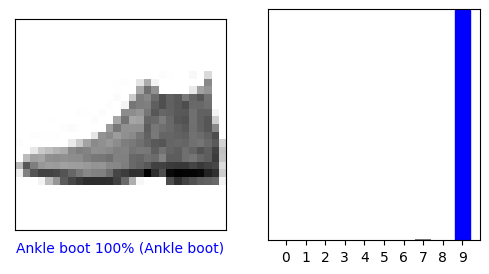

In [13]:
#Showing the first image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

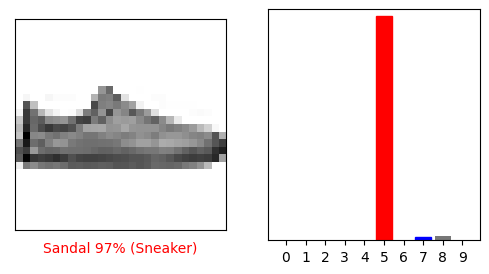

In [14]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### Plot the first x test images
### Correct predictions in blue and incorrect predictions are in red.
Note: The model can be wrong even tho very confident

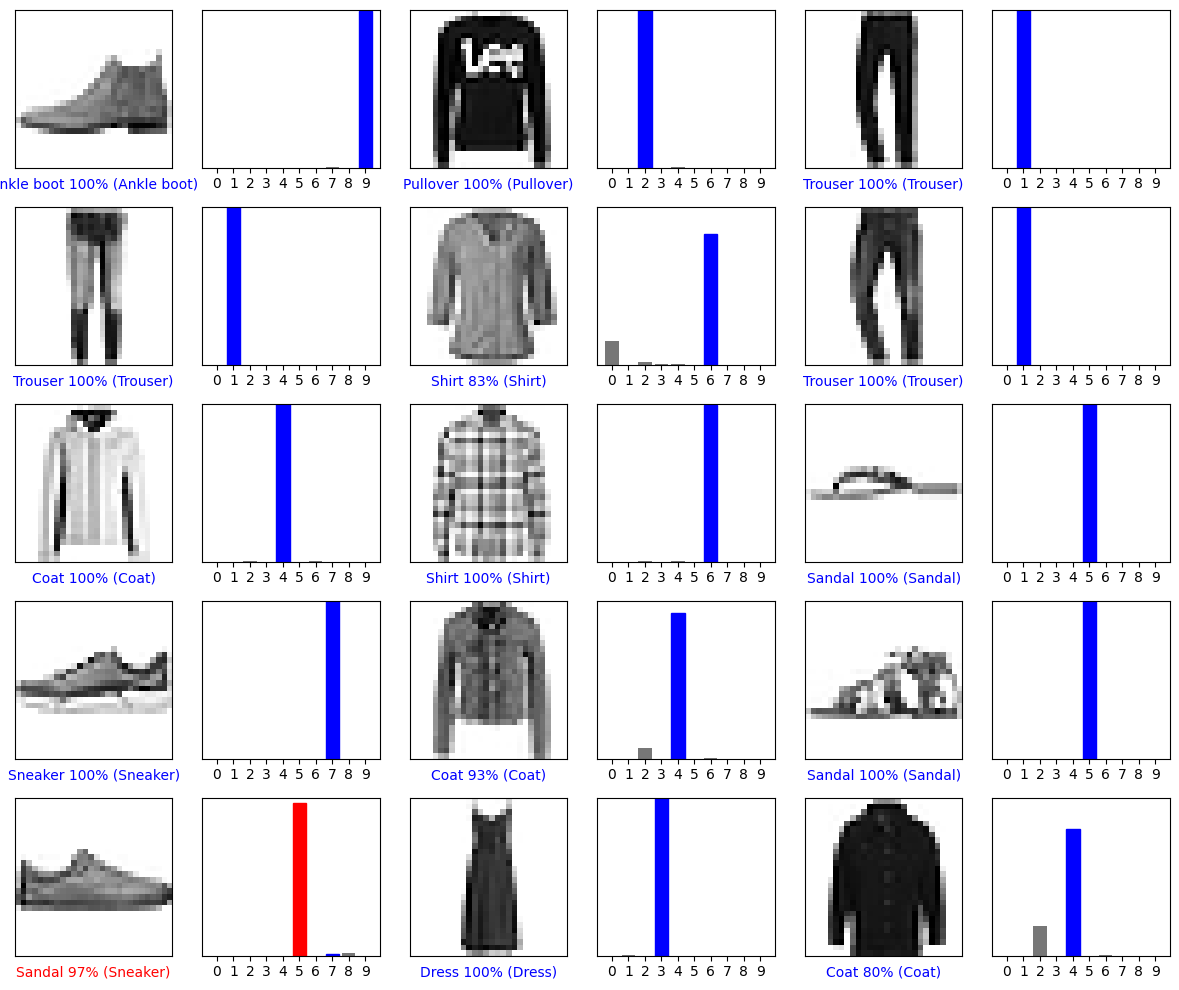

In [15]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use model for prediction

In [ ]:
# Add the image to empty batch
img = test_images[1]
img = (np.expand_dims(img,0))

print(img.shape)

1/1 [==============================] - 0s 9ms/step


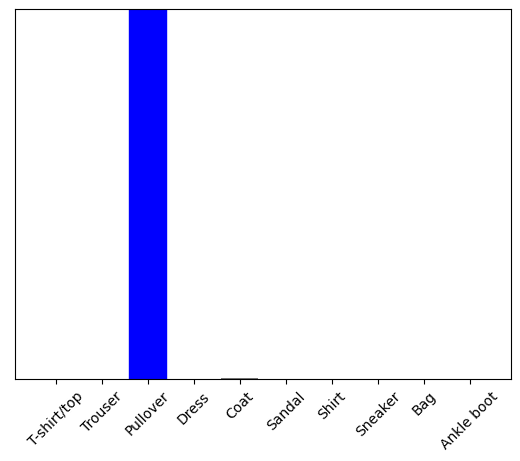

In [17]:
predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

## Summary
The final model is now trained and exported in .h5 format. It processes an images of size 28x28 in greyscale format  and provides a prediction between 0 and 9, each representing a piece of clothing